# Introduzione al pacchetto Pandas

Pandas è una libreria ampiamente utilizzata nell'analisi dei dati e nel machine learning.
Organizza i dati in maniera tabellare, similmente ai fogli di calcolo, ma con funzionalità molto più evolute.

Rispetto a ```numpy``` le colonne possono avere dei nomi, possono ciascuna avere tipi diversi, e sono indicizzate.

* <a href="https://pandas.pydata.org/">Riferimenti</a>.
* <a href="https://youtu.be/vmEHCJofslg">Video tutorial</a>.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import wget

Legiamo i dati sulla pandemia covid 19 dal repository [GitHub](https://github.com/pcm-dpc/COVID-19) del Dipartimento di Protezione Civile. È anche possibile importare da un file in formato xlsx.

La documentazione sui vari campi si trova [sempre su Git](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md).

In [2]:
wget.download('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', out='data')

'data/dpc-covid19-ita-regioni.csv'

In [3]:
df = pd.read_csv('data/dpc-covid19-ita-regioni.csv')

In [4]:
# Load directly from URL, without intermediate local download
#
#df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

Si può visualizzare la struttura, mostrandole prime e le ultime righe della tabella.

In [5]:
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,2022-03-13T17:00:00,ITA,19,Sicilia,38.115697,13.362357,829,66,895,227297,...,DECEDUTI: N. 1 IL 12/03/2022 - N. 7 IL 11/03/2...,6.0,NaN,Sul numero complessivo dei casi confermati com...,485374.0,371436.0,4431101.0,6770285.0,ITG,ITG1
15725,2022-03-13T17:00:00,ITA,9,Toscana,43.769231,11.255889,628,39,667,28153,...,NaN,5.0,NaN,NaN,565736.0,330905.0,6454332.0,6049308.0,ITI,ITI1
15726,2022-03-13T17:00:00,ITA,10,Umbria,43.106758,12.388247,155,5,160,14888,...,- Si fa presente che 2 dei ricoveri non UTI ap...,0.0,NaN,NaN,122428.0,78515.0,1548990.0,2264241.0,ITI,ITI2
15727,2022-03-13T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,21,1,22,924,...,NaN,0.0,NaN,NaN,13728.0,17820.0,135486.0,341141.0,ITC,ITC2


```df.head``` mostra le prime righe in formato testuale.

In [6]:
print(df.head(20))

                   data stato  codice_regione  denominazione_regione  \
0   2020-02-24T18:00:00   ITA              13                Abruzzo   
1   2020-02-24T18:00:00   ITA              17             Basilicata   
2   2020-02-24T18:00:00   ITA              18               Calabria   
3   2020-02-24T18:00:00   ITA              15               Campania   
4   2020-02-24T18:00:00   ITA               8         Emilia-Romagna   
5   2020-02-24T18:00:00   ITA               6  Friuli Venezia Giulia   
6   2020-02-24T18:00:00   ITA              12                  Lazio   
7   2020-02-24T18:00:00   ITA               7                Liguria   
8   2020-02-24T18:00:00   ITA               3              Lombardia   
9   2020-02-24T18:00:00   ITA              11                 Marche   
10  2020-02-24T18:00:00   ITA              14                 Molise   
11  2020-02-24T18:00:00   ITA              21           P.A. Bolzano   
12  2020-02-24T18:00:00   ITA              22            P.A. Tr

Stampiamo l'elenco delle colonne:

In [7]:
print(df.columns)

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')


Selezioniamo una specifica colonna:

In [8]:
df['denominazione_regione']

0               Abruzzo
1            Basilicata
2              Calabria
3              Campania
4        Emilia-Romagna
              ...      
15724           Sicilia
15725           Toscana
15726            Umbria
15727     Valle d'Aosta
15728            Veneto
Name: denominazione_regione, Length: 15729, dtype: object

Equivalentemente:

In [9]:
df.denominazione_regione

0               Abruzzo
1            Basilicata
2              Calabria
3              Campania
4        Emilia-Romagna
              ...      
15724           Sicilia
15725           Toscana
15726            Umbria
15727     Valle d'Aosta
15728            Veneto
Name: denominazione_regione, Length: 15729, dtype: object

In [10]:
df.denominazione_regione[3]

'Campania'

Selezioniamo più colonne:

In [11]:
df1 = df[['denominazione_regione', 'data', 'terapia_intensiva']]
df1

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0
3,Campania,2020-02-24T18:00:00,0
4,Emilia-Romagna,2020-02-24T18:00:00,2
...,...,...,...
15724,Sicilia,2022-03-13T17:00:00,66
15725,Toscana,2022-03-13T17:00:00,39
15726,Umbria,2022-03-13T17:00:00,5
15727,Valle d'Aosta,2022-03-13T17:00:00,1


Selezioniamo alcune righe in base all'indice. La documentazione dettagliata è [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [12]:
df1.iloc[0]

denominazione_regione                Abruzzo
data                     2020-02-24T18:00:00
terapia_intensiva                          0
Name: 0, dtype: object

In [13]:
df1.iloc[0:3]

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0


Selezioniamo una cella individualmente. Questa modalità è simile al modo di indirizzare una cella in un foglio di calcolo (excel, google spreadsheet, ...)

In [14]:
df1.iloc[0,0]

'Abruzzo'

In [15]:
df1['denominazione_regione']=="Campania"

0        False
1        False
2        False
3         True
4        False
         ...  
15724    False
15725    False
15726    False
15727    False
15728    False
Name: denominazione_regione, Length: 15729, dtype: bool

Selezioniamo le righe in base ad una condizione booleana. Ulteriore documentazione si trova [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [16]:
df_campania = df1.loc[df1['denominazione_regione']=="Campania"]
df_campania

,denominazione_regione,data,terapia_intensiva
3,Campania,2020-02-24T18:00:00,0
24,Campania,2020-02-25T18:00:00,0
45,Campania,2020-02-26T18:00:00,0
66,Campania,2020-02-27T18:00:00,0
87,Campania,2020-02-28T18:00:00,0
...,...,...,...
15627,Campania,2022-03-09T17:00:00,28
15648,Campania,2022-03-10T17:00:00,26
15669,Campania,2022-03-11T17:00:00,25
15690,Campania,2022-03-12T17:00:00,28


Iterazione su tutte le righe

In [17]:
i = 0
for index, row in df_campania.iterrows():
    print(i, index, row['data'], row['terapia_intensiva'])
    i += 1

0 3 2020-02-24T18:00:00 0
1 24 2020-02-25T18:00:00 0
2 45 2020-02-26T18:00:00 0
3 66 2020-02-27T18:00:00 0
4 87 2020-02-28T18:00:00 0
5 108 2020-02-29T17:00:00 0
6 129 2020-03-01T17:00:00 0
7 150 2020-03-02T18:00:00 0
8 171 2020-03-03T18:00:00 0
9 192 2020-03-04T17:00:00 0
10 213 2020-03-05T17:00:00 0
11 234 2020-03-06T17:00:00 0
12 255 2020-03-07T18:00:00 0
13 276 2020-03-08T18:00:00 7
14 297 2020-03-09T18:00:00 8
15 318 2020-03-10T18:00:00 8
16 339 2020-03-11T17:00:00 11
17 360 2020-03-12T17:00:00 11
18 381 2020-03-13T17:00:00 19
19 402 2020-03-14T17:00:00 17
20 423 2020-03-15T17:00:00 22
21 444 2020-03-16T17:00:00 22
22 465 2020-03-17T17:00:00 24
23 486 2020-03-18T17:00:00 24
24 507 2020-03-19T17:00:00 36
25 528 2020-03-20T17:00:00 41
26 549 2020-03-21T17:00:00 87
27 570 2020-03-22T17:00:00 99
28 591 2020-03-23T17:00:00 110
29 612 2020-03-24T17:00:00 181
30 633 2020-03-25T17:00:00 123
31 654 2020-03-26T17:00:00 114
32 675 2020-03-27T17:00:00 113
33 696 2020-03-28T17:00:00 132
34 717

538 11301 2021-08-15T17:00:00 15
539 11322 2021-08-16T17:00:00 15
540 11343 2021-08-17T17:00:00 18
541 11364 2021-08-18T17:00:00 20
542 11385 2021-08-19T17:00:00 23
543 11406 2021-08-20T17:00:00 22
544 11427 2021-08-21T17:00:00 22
545 11448 2021-08-22T17:00:00 22
546 11469 2021-08-23T17:00:00 23
547 11490 2021-08-24T17:00:00 20
548 11511 2021-08-25T17:00:00 18
549 11532 2021-08-26T17:00:00 21
550 11553 2021-08-27T17:00:00 21
551 11574 2021-08-28T17:00:00 20
552 11595 2021-08-29T17:00:00 19
553 11616 2021-08-30T17:00:00 18
554 11637 2021-08-31T17:00:00 23
555 11658 2021-09-01T17:00:00 22
556 11679 2021-09-02T17:00:00 26
557 11700 2021-09-03T17:00:00 25
558 11721 2021-09-04T17:00:00 26
559 11742 2021-09-05T17:00:00 31
560 11763 2021-09-06T17:00:00 28
561 11784 2021-09-07T17:00:00 26
562 11805 2021-09-08T17:00:00 23
563 11826 2021-09-09T17:00:00 21
564 11847 2021-09-10T17:00:00 21
565 11868 2021-09-11T17:00:00 21
566 11889 2021-09-12T17:00:00 22
567 11910 2021-09-13T17:00:00 21
568 11931 

Un minimo di statistica...

In [18]:
df.loc[df['denominazione_regione']=='Campania'].describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,749.0,7.490000e+02,7.490000e+02,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,...,162.000000,162.000000,7.490000e+02,7.490000e+02,6.940000e+02,466.000000,423.000000,423.000000,4.230000e+02,4.230000e+02
mean,15.0,4.083957e+01,1.425085e+01,717.510013,60.887850,778.397864,45148.169559,45926.567423,164.082777,1683.707610,...,30418.993827,1237.037037,3.046900e+05,3.967987e+06,2.175326e+06,6.583691,460189.146572,47642.087470,4.975490e+06,1.583276e+06
std,0.0,1.422035e-14,1.777544e-15,612.587921,56.675672,665.926488,56623.011769,57094.770662,2896.093369,3379.184563,...,43478.864228,1100.491939,3.053732e+05,3.818725e+06,1.525123e+06,6.399132,170363.508399,98878.627486,1.569030e+06,1.652149e+06
min,15.0,4.083957e+01,1.425085e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-48092.000000,-229.000000,...,0.000000,0.000000,0.000000e+00,1.000000e+01,3.499400e+04,0.000000,204923.000000,73.000000,2.207249e+06,1.353000e+03
25%,15.0,4.083957e+01,1.425085e+01,223.000000,17.000000,236.000000,2392.000000,3019.000000,-190.000000,111.000000,...,4944.500000,76.000000,6.612000e+03,4.067490e+05,4.400322e+05,1.000000,381179.000000,11588.000000,3.925870e+06,3.940665e+05
50%,15.0,4.083957e+01,1.425085e+01,439.000000,31.000000,478.000000,10436.000000,10772.000000,14.000000,533.000000,...,7782.000000,1282.000000,2.769760e+05,3.015852e+06,2.446230e+06,4.000000,426185.000000,11588.000000,4.889978e+06,9.819060e+05
75%,15.0,4.083957e+01,1.425085e+01,1351.000000,103.000000,1460.000000,78860.000000,80158.000000,245.000000,1665.000000,...,31464.000000,2271.000000,4.484500e+05,6.226755e+06,3.499866e+06,11.000000,476791.500000,11588.000000,5.794390e+06,2.118854e+06
max,15.0,4.083957e+01,1.425085e+01,2331.000000,227.000000,2532.000000,252630.000000,254079.000000,21292.000000,30042.000000,...,155170.000000,3104.000000,1.261131e+06,1.414820e+07,4.629512e+06,29.000000,857878.000000,403253.000000,8.183184e+06,5.965017e+06


Ordinamento per i valori di una colonna della tabella

In [19]:
df1.loc[df1['data']=='2021-03-15T17:00:00'].sort_values('terapia_intensiva',ascending=False)

,denominazione_regione,data,terapia_intensiva
8093,Lombardia,2021-03-15T17:00:00,728
8089,Emilia-Romagna,2021-03-15T17:00:00,373
8091,Lazio,2021-03-15T17:00:00,293
8098,Piemonte,2021-03-15T17:00:00,276
8102,Toscana,2021-03-15T17:00:00,241
8099,Puglia,2021-03-15T17:00:00,189
8105,Veneto,2021-03-15T17:00:00,186
8088,Campania,2021-03-15T17:00:00,161
8094,Marche,2021-03-15T17:00:00,132
8101,Sicilia,2021-03-15T17:00:00,107


Grafici con mathplotlib

<Figure size 432x288 with 0 Axes>

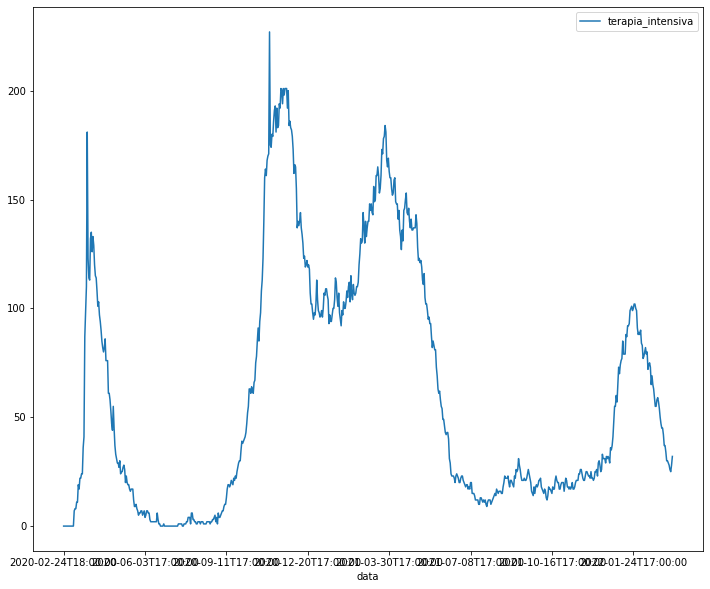

In [20]:
plt.figure()
ax = df_campania.plot(x='data',y='terapia_intensiva',figsize=(12,10))

Manipolazione delle date

In [21]:
df['data']

0        2020-02-24T18:00:00
1        2020-02-24T18:00:00
2        2020-02-24T18:00:00
3        2020-02-24T18:00:00
4        2020-02-24T18:00:00
                ...         
15724    2022-03-13T17:00:00
15725    2022-03-13T17:00:00
15726    2022-03-13T17:00:00
15727    2022-03-13T17:00:00
15728    2022-03-13T17:00:00
Name: data, Length: 15729, dtype: object

In [22]:
df['data_dt'] = pd.to_datetime(df['data'])

In [23]:
df[['data', 'data_dt']]

,data,data_dt
0,2020-02-24T18:00:00,2020-02-24 18:00:00
1,2020-02-24T18:00:00,2020-02-24 18:00:00
2,2020-02-24T18:00:00,2020-02-24 18:00:00
3,2020-02-24T18:00:00,2020-02-24 18:00:00
4,2020-02-24T18:00:00,2020-02-24 18:00:00
...,...,...
15724,2022-03-13T17:00:00,2022-03-13 17:00:00
15725,2022-03-13T17:00:00,2022-03-13 17:00:00
15726,2022-03-13T17:00:00,2022-03-13 17:00:00
15727,2022-03-13T17:00:00,2022-03-13 17:00:00


In [24]:
day_1 = df['data_dt'].min()

In [25]:
day_1

Timestamp('2020-02-24 18:00:00')

In [26]:
df['giorni'] = (df['data_dt'] - day_1).dt.days

In [27]:
df[['giorni', 'data_dt']]

,giorni,data_dt
0,0,2020-02-24 18:00:00
1,0,2020-02-24 18:00:00
2,0,2020-02-24 18:00:00
3,0,2020-02-24 18:00:00
4,0,2020-02-24 18:00:00
...,...,...
15724,747,2022-03-13 17:00:00
15725,747,2022-03-13 17:00:00
15726,747,2022-03-13 17:00:00
15727,747,2022-03-13 17:00:00


In [28]:
df_campania = df.loc[df1['denominazione_regione']=="Campania"]

In [29]:
df_campania[['giorni', 'data_dt']]

,giorni,data_dt
3,0,2020-02-24 18:00:00
24,1,2020-02-25 18:00:00
45,2,2020-02-26 18:00:00
66,3,2020-02-27 18:00:00
87,4,2020-02-28 18:00:00
...,...,...
15627,743,2022-03-09 17:00:00
15648,744,2022-03-10 17:00:00
15669,745,2022-03-11 17:00:00
15690,746,2022-03-12 17:00:00


In [30]:
df_regione = df.loc[(df['denominazione_regione']=='Piemonte') & (df['giorni']>204)].copy().reset_index(drop=True)

<AxesSubplot:xlabel='giorni'>

<Figure size 864x720 with 0 Axes>

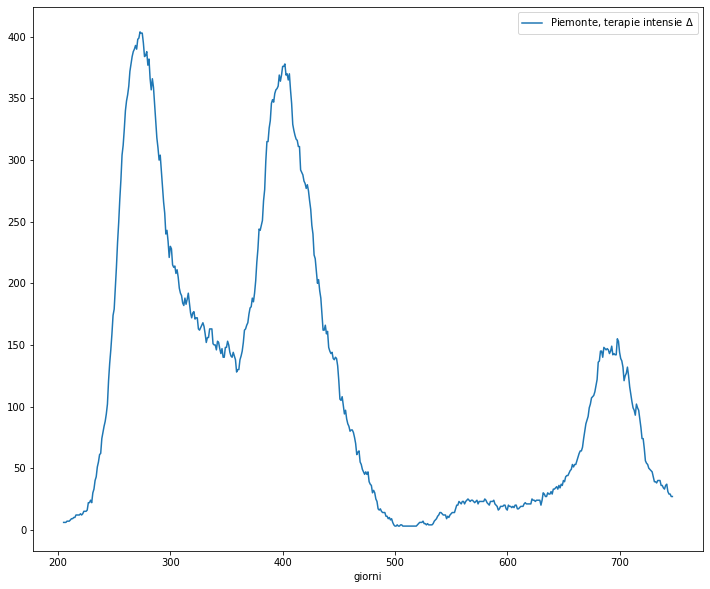

In [31]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()
df_regione.plot(x='giorni', y='terapia_intensiva', ax=ax, figsize=(12,10), label='Piemonte, terapie intensie $\Delta$')
# In alternativa, è possibile passare direttamente le colonne del DataFramce a matplotlib:
#plt.plot(df_regione['giorni'],df_regione['terapia_intensiva'])

Per calcolare la differenza con ciascuno dei giorni precedenti basta fare lo *shift* della colonna e sottrarla alla colonna stessa:

In [39]:
df_regione['terapia_intensiva_gg']=df_regione['terapia_intensiva']-df_regione['terapia_intensiva'].shift(1)

Per fare lo stesso calcolo con un codice tradizionale che usa un loop, il codice diventa decisamente più involuto. <span style="color:blue;">Ogni volta che è possibile, conviene usare le funzioni di pandas perché sono più efficienti e richiedono meno linee di codice.</span>

In [42]:
import numpy as np
df_regione['terapia_intensiva_gg_loop'] = np.nan
prev = 0
i = 0 
for ti in df_regione['terapia_intensiva']:
    if i > 0: df_regione['terapia_intensiva_gg_loop'].at[i]=ti - prev
    prev = ti
    i += 1

In [43]:
df_regione[['terapia_intensiva', 'terapia_intensiva_gg', 'terapia_intensiva_gg_loop']]

,terapia_intensiva,terapia_intensiva_gg,terapia_intensiva_gg_loop
0,6,NaN,NaN
1,6,0.0,0.0
2,6,0.0,0.0
3,7,1.0,1.0
4,7,0.0,0.0
...,...,...,...
538,31,-6.0,-6.0
539,29,-2.0,-2.0
540,29,0.0,0.0
541,27,-2.0,-2.0


Per il calcolo della **media mobile**, è possibile usare la funzione [```rolling```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) che raggruppa gli ultimi valori per poter calcolare semplici indicatori statistici (somma, media, ecc.). Esistono opzioni per dare un peso ai diversi valori per usi molto particolari.

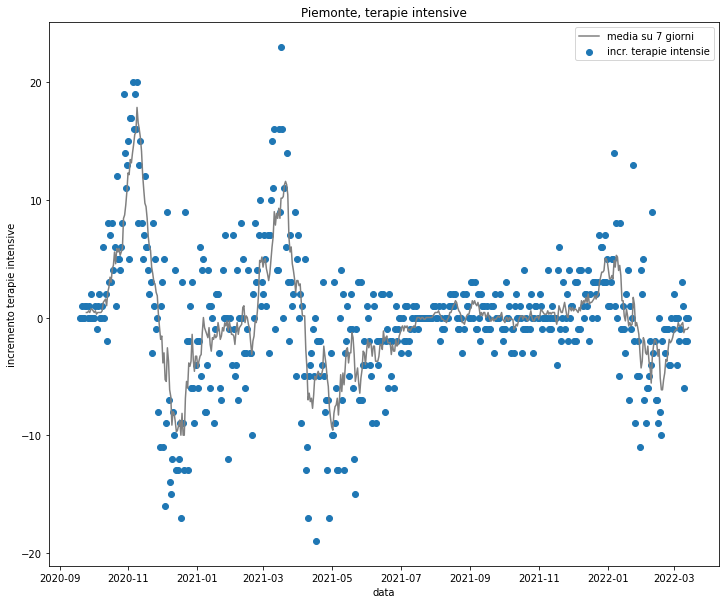

In [44]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(x=df_regione.data_dt, y=df_regione.terapia_intensiva_gg, label='incr. terapie intensie')
ax.plot(df_regione.data_dt, df_regione.terapia_intensiva_gg.rolling(window=7).mean(), color='gray', label='media su 7 giorni')
ax.set_title('Piemonte, terapie intensive')
ax.set_xlabel('data')
ax.set_ylabel('incremento terapie intensive')
ax.legend()

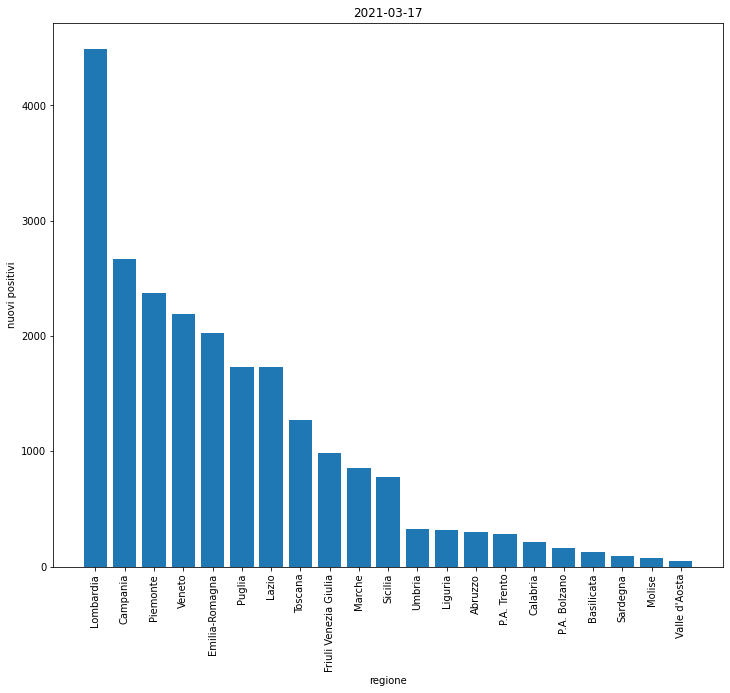

In [45]:
df_today=df[df['data']=='2021-03-17T17:00:00'].copy().reset_index(drop=True)
df_today=df_today.sort_values(by=['nuovi_positivi'], ascending=False)
fig, ax = plt.subplots(figsize=(12,10))
ax.bar(df_today['denominazione_regione'], df_today['nuovi_positivi'])
ax.set_xlabel('regione')
ax.set_ylabel('nuovi positivi')
plt.title('2021-03-17')
plt.xticks(rotation='vertical')
plt.show()

# Spunti per esercizi

* usando lo stesso dataframe del Dipartimento della Protezione Civile, fare grafici delle seguenti quantità:
    * totale positivi in Campania (o una regione che preferite) in funzione della data
    * positivi giornalieri in Campania in funzione della data
    * media mobile a 7 giorni dei positivi giornalieri in Campania in funzione della data
    * distribuzione del numero di decessi totale per regione ad oggi
    * distribuzione del numero di positivi giornalieri rispetto al numero di tamponi fatti in funzione della data
    * ...

* creare un data frame con la propria agenda telefonica.

*Hint* usare tutorial e guide in rete su come creare un DataFrame da zero. Ad esempio [questo](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

* creare un data frame con i risultati del calendario di serie A e da questo determinare la classifica.

*Hint*: alcuni dati si possono trovare [qui](https://www.kaggle.com/massibelloni/serie-a-19932017) oppure [qui](https://www.football-data.co.uk/italym.php) in formato CSV. Il significato degli acronimi si trova [qui](https://rstudio-pubs-static.s3.amazonaws.com/338127_f85723bf6d9b4637a4c5e1ff8f838432.html).

* Variazione sul tema: creare un data frame con il numero di rigori per stagione di ciascuna squadra e graficare l'andamento negli anni

*Hint*: le statistiche sui rigori ricevuti si trovano su <a href="https://www.transfermarkt.it/serie-a/topErhalteneElfmeter/wettbewerb/IT1/plus/?saison_id=2018">transfermarkt</a>. Ma non sono scaricabili in CSV. <a href="https://www.kaggle.com/emilerichard/penalty-statistics-20192020">qui</a> c'è il file per il 2019-2020.

Altri esempi di dataset si possono trovare nei seguenti repositories:
* <a href="https://datasetsearch.research.google.com/">Google dataset search</a>
* <a href="https://www.kaggle.com/">Kaggle</a>
* <a href="https://archive.ics.uci.edu/ml/index.php">Machine learning repository</a>
* <a href="https://datahub.io/">DataHub</a>
* <a href="https://data.humdata.org/dataset">HDX</a>

<span style="color: gray">Si ringrazia G. Bonifazi per le fonti citate sopra.</span>